## 34단계: sin 함수 고차 미분분

> 지금까지 고차 미분에 대응하는 함수들(Add, Mul, Neg, Sub, Div, Pow 클래스)을 구현하여 `dezero/core.py`에 추가해뒀습니다. 이번 단계에서는 새로운 DeZero 함수 몇 개를 추가로 구현하겠습니다.

### 34.1 sin 함수 구현

$y = sin(x)$일 때, $\frac{\partial y}{\partial x} = cos(x)$

In [1]:
import numpy as np
from dezero.core import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * cos(x)  # gx가 Variable 이어야 하므로 cos()는 dezero의 함수임
        return gx

def sin(x):
    return Sin()(x)

### 34.2 cos 함수 구현

$y = cos(x)$일 때, $\frac{\partial y}{\partial x} = -sin(x)$

In [2]:
class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * -sin(x)
        return gx

def cos(x):
    return Cos()(x)

이제부터 추가되는 함수들은 전부 `dezero/functions.py`에 추가한다.

### 34.3 sin 함수 고차 미분

sin함수의 1차, 2차, 3차 미분을 구해보자.

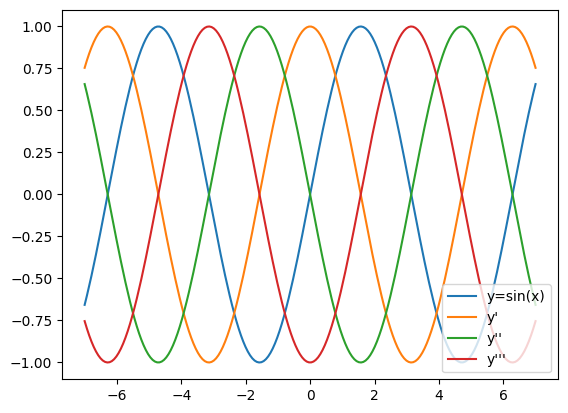

In [3]:
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data]

for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc="lower right")
plt.show()